# Review

geshun

In [ ]:
reticulate::use_condaenv('base')

### About Dataset

The file `emergency-calls.csv` contains emergency calls recorded in
`2021` in a major city in USA.

`Report Date`: The month data was recorded.

`Emergency Count`: The total number of emergency calls.

`Average Wait Time`: The average time (in minutes) to respond to an
emergency call.

### To Do

Import the following packages: `pandas, matplotlib`

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Read the `.csv` file as a `Pandas DataFrame`

In [ ]:
df = pd.read_csv('emergency-calls.csv')

How many observations and features are in the emergency dataset?

In [ ]:
df.shape

(12, 3)

Does the dataset contain any missing values?

In [ ]:
df.isnull().mean().sum()

0.0

Plot the `DataFrame` . What can you say about the plot output?

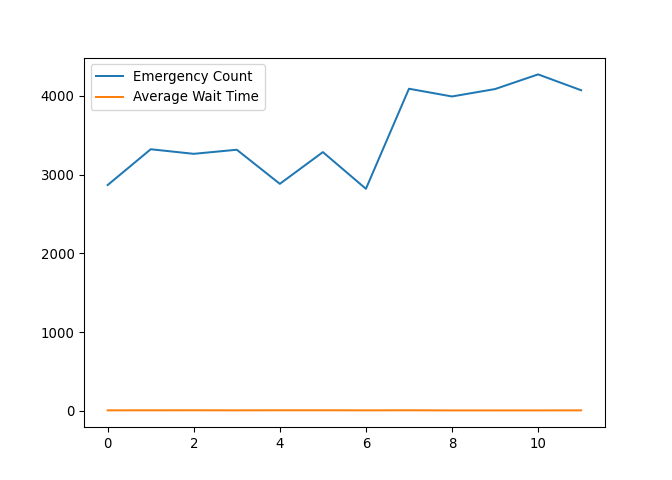

In [ ]:
df.plot()
plt.show()

Plot the average wait time first as a `Series` and then as a `DataFrame`

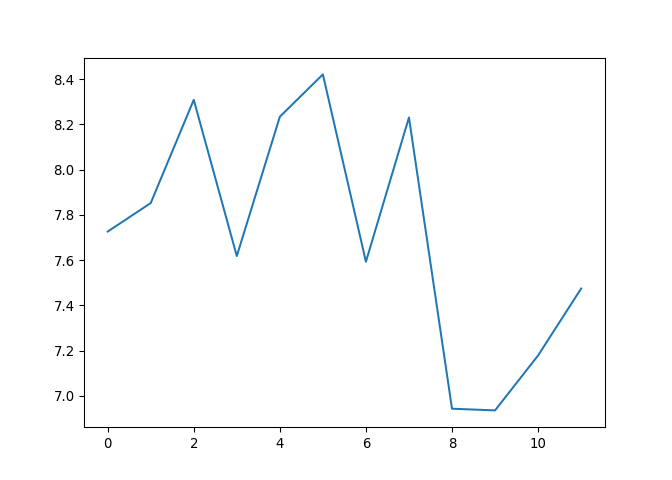

In [ ]:
df['Average Wait Time'].plot()
plt.show()

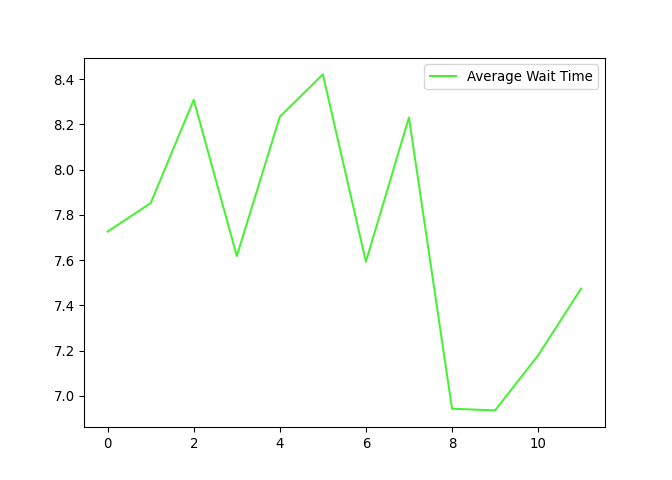

In [ ]:
df[['Average Wait Time']].plot(color='#45f232')
plt.show()

The target is to have an average response time of `8` minutes. Find all
records that are above this target.

In [ ]:
df[df['Average Wait Time'] > 8]

  Report Date  Emergency Count  Average Wait Time
2  2021-03-01             3263           8.308221
4  2021-05-01             2882           8.233394
5  2021-06-01             3285           8.420488
7  2021-08-01             4089           8.230229

  Report Date  Emergency Count  Average Wait Time
2  2021-03-01             3263           8.308221
4  2021-05-01             2882           8.233394
5  2021-06-01             3285           8.420488
7  2021-08-01             4089           8.230229

How can we establish if the columns are in the desired data types? Are
there any type conversion you want to do?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Report Date        12 non-null     object 
 1   Emergency Count    12 non-null     int64  
 2   Average Wait Time  12 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 416.0+ bytes

Get the summary of the columns to know about the data distribution.

In [ ]:
df.describe()

       Emergency Count  Average Wait Time
count        12.000000          12.000000
mean       3521.500000           7.709368
std         544.313997           0.520084
min        2819.000000           6.935762
25%        3167.750000           7.400266
50%        3318.000000           7.671878
75%        4073.750000           8.231021
max        4271.000000           8.420488

Set the `Report Date` as the index of the `DataFrame`

In [ ]:
df.set_index(['Report Date'], inplace=True)

Plot the `DataFrame` again

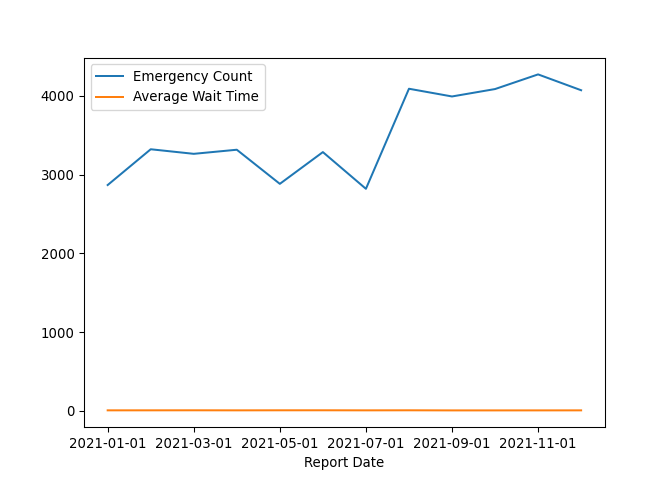

In [ ]:
df.plot()
plt.show()

Convert the `Report Date` index to a datetime object and plot the
`DataFrame` . Do you realize any difference in visualization?

In [ ]:
df.index = pd.to_datetime(df.index)

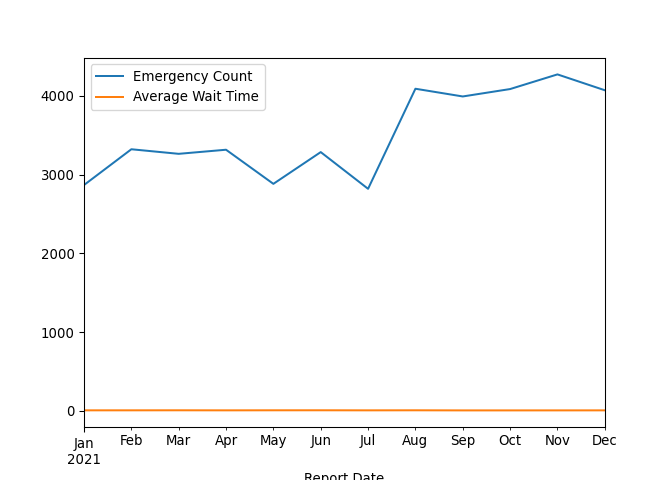

In [ ]:
df.plot()
plt.show()

Discuss the information or knowledge you have gained about the data

Reset the index of the `DataFrame` so that we have 3 columns

In [ ]:
df.reset_index(inplace=True)

The column names have space in them (and thus can be used as attributes
of the `DataFrame`). Do this to verify `df.columns`. Replace the spaces
with underscore `_` and convert to lower case. For instance,
`Report Date` should be `report_date`

In [ ]:
df.rename(columns=lambda col: col.replace(" ", "_").lower(), inplace=True)

If the `report_date` field is not datetime object, convert it. Create a
new column and call it `report_month` which contains the month name.

In [ ]:
df['report_month'] = df.report_date.dt.month_name()

Do you think the `report_month` field should be categorical? If yes how
do you convert to categorical? Try providing order if you want to treat
the field as categorical.

Which months in `2021` recorded the maximum and minimum emergency call
count?

In [ ]:
df[(df.emergency_count == df.emergency_count.max()) | (df.emergency_count == df.emergency_count.min())]

   report_date  emergency_count  average_wait_time report_month
6   2021-07-01             2819           7.592773         July
10  2021-11-01             4271           7.178505     November

   report_date  emergency_count  average_wait_time report_month
6   2021-07-01             2819           7.592773         July
10  2021-11-01             4271           7.178505     November

Find the average call volume for each quarter of the year

In [ ]:
df['report_quarter'] = df.report_date.dt.quarter
df.groupby(['report_quarter'])['emergency_count'].mean()

report_quarter
1    3150.333333
2    3160.666667
3    3633.000000
4    4142.000000
Name: emergency_count, dtype: float64

Is there a correlation between call volume and response time? What can
you say about the nature of the correlation?

In [ ]:
df.drop(['report_quarter'], axis=1, inplace=True)
df.corr()

                   emergency_count  average_wait_time
emergency_count           1.000000          -0.521401
average_wait_time        -0.521401           1.000000

Extract a feature from the Emergency Count that can be used as a base
predictor for call volume in January 2022. Use the same principle to
predict the average wait time.

In [ ]:
df.emergency_count.mean()

3521.5